In [26]:
# !pip install dspy-ai

In [27]:
import dspy
import os
from dotenv import load_dotenv

In [28]:
load_dotenv()

True

In [29]:
import os

openai_api_key = os.getenv("OPENAI_API_KEY")
#print(openai_api_key)


In [ ]:

# Authenticate via `OPENAI_API_KEY` env: import os; os.environ['OPENAI_API_KEY'] = 'here'
turbo = dspy.LM('openai/gpt-4.1', api_key=openai_api_key)
dspy.configure(lm=turbo)

In [31]:
predict = dspy.Predict("question -> answer")

In [32]:
prediction = predict(question="Who scored the final goal in football word cup finals in 2014")

In [33]:
prediction

Prediction(
    answer='The final goal in the 2014 FIFA World Cup final was scored by Mario Götze for Germany. He scored in the 113th minute of extra time against Argentina, securing a 1–0 victory for Germany.'
)

In [34]:
prediction.answer

'The final goal in the 2014 FIFA World Cup final was scored by Mario Götze for Germany. He scored in the 113th minute of extra time against Argentina, securing a 1–0 victory for Germany.'

In [35]:
turbo.inspect_history(1)





[2026-02-12T09:47:48.177982]

System message:

Your input fields are:
1. `question` (str):
Your output fields are:
1. `answer` (str):
All interactions will be structured in the following way, with the appropriate values filled in.

[[ ## question ## ]]
{question}

[[ ## answer ## ]]
{answer}

[[ ## completed ## ]]
In adhering to this structure, your objective is: 
        Given the fields `question`, produce the fields `answer`.


User message:

[[ ## question ## ]]
Who scored the final goal in football word cup finals in 2014

Respond with the corresponding output fields, starting with the field `[[ ## answer ## ]]`, and then ending with the marker for `[[ ## completed ## ]]`.


Response:

[[ ## answer ## ]]
The final goal in the 2014 FIFA World Cup final was scored by Mario Götze for Germany. He scored in the 113th minute of extra time against Argentina, securing a 1–0 victory for Germany.

[[ ## completed ## ]]







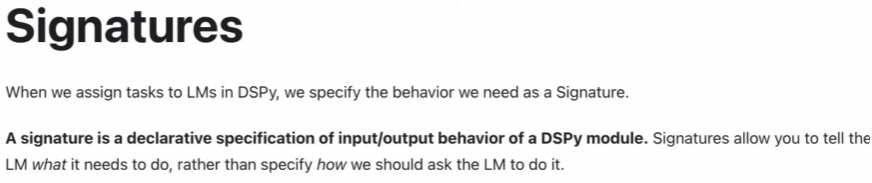

In [36]:
## Defining Signature
class QA(dspy.Signature):
    question = dspy.InputField()
    answer = dspy.OutputField()

In [37]:
predict = dspy.Predict(QA) #Instead of dspy.predict("question -> answer")
prediction = predict(question="Who scored the final goal in football word cup finals in 2014")
print(prediction)

Prediction(
    answer='The final goal in the 2014 FIFA World Cup final was scored by Mario Götze for Germany. He scored in the 113th minute of extra time against Argentina, securing a 1–0 victory for Germany.'
)


In [38]:
prediction.answer

'The final goal in the 2014 FIFA World Cup final was scored by Mario Götze for Germany. He scored in the 113th minute of extra time against Argentina, securing a 1–0 victory for Germany.'

In [39]:
turbo.inspect_history(n=1)





[2026-02-12T09:47:48.235686]

System message:

Your input fields are:
1. `question` (str):
Your output fields are:
1. `answer` (str):
All interactions will be structured in the following way, with the appropriate values filled in.

[[ ## question ## ]]
{question}

[[ ## answer ## ]]
{answer}

[[ ## completed ## ]]
In adhering to this structure, your objective is: 
        Given the fields `question`, produce the fields `answer`.


User message:

[[ ## question ## ]]
Who scored the final goal in football word cup finals in 2014

Respond with the corresponding output fields, starting with the field `[[ ## answer ## ]]`, and then ending with the marker for `[[ ## completed ## ]]`.


Response:

[[ ## answer ## ]]
The final goal in the 2014 FIFA World Cup final was scored by Mario Götze for Germany. He scored in the 113th minute of extra time against Argentina, securing a 1–0 victory for Germany.

[[ ## completed ## ]]







### Signature (with comment)
Docstrings and Variable names matter!

In [40]:
class QA(dspy.Signature):
    """Given the question, generate the answer"""
    question = dspy.InputField(desc="User's question")
    answer = dspy.OutputField(desc="often between 1 and 5 words")

In [41]:
turbo.inspect_history(n=1)





[2026-02-12T09:47:48.235686]

System message:

Your input fields are:
1. `question` (str):
Your output fields are:
1. `answer` (str):
All interactions will be structured in the following way, with the appropriate values filled in.

[[ ## question ## ]]
{question}

[[ ## answer ## ]]
{answer}

[[ ## completed ## ]]
In adhering to this structure, your objective is: 
        Given the fields `question`, produce the fields `answer`.


User message:

[[ ## question ## ]]
Who scored the final goal in football word cup finals in 2014

Respond with the corresponding output fields, starting with the field `[[ ## answer ## ]]`, and then ending with the marker for `[[ ## completed ## ]]`.


Response:

[[ ## answer ## ]]
The final goal in the 2014 FIFA World Cup final was scored by Mario Götze for Germany. He scored in the 113th minute of extra time against Argentina, securing a 1–0 victory for Germany.

[[ ## completed ## ]]







#### Example 2 : Chain of Thought Prompting

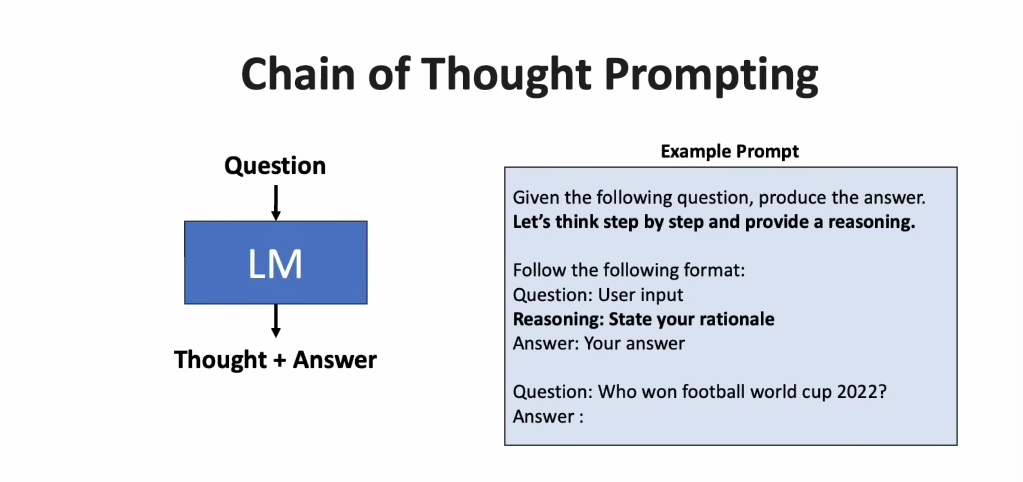

In [42]:
question = "Who provided the assist for the goal in football word cup finals in 2014"
predict = dspy.Predict(QA)
prediction = predict(question=question)

In [43]:
prediction.answer

'André Schürrle'

#### GPT 3.5 didn't give correct answer for this . GPT 4.1 gave correct answer. We can do better by incorporating chain of thought

In [44]:
generate_answer = dspy.ChainOfThought(QA)
prediction = generate_answer(question=question)

In [45]:
prediction.answer

'André Schürrle'

In [46]:
prediction.answer

'André Schürrle'